Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('C:/Users/charm/Music/Multiple Disease Prediction System/Multiple Disease Prediction System/dataset/parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    int64  
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.000000,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,56.435804,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,1.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,49.500000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,98.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,146.500000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,195.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [9]:
# grouping the data based on the target variable
parkinsons_data.groupby('status').mean()
import warnings
warnings.simplefilter("ignore")

Data Pre-Processing

Separating the features & Target

In [10]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [11]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)   
0        119.992       157.302        74.997         0.00784  \
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer   
0             0.00007   0.00370   0.00554     0.01109       0.04374  \
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


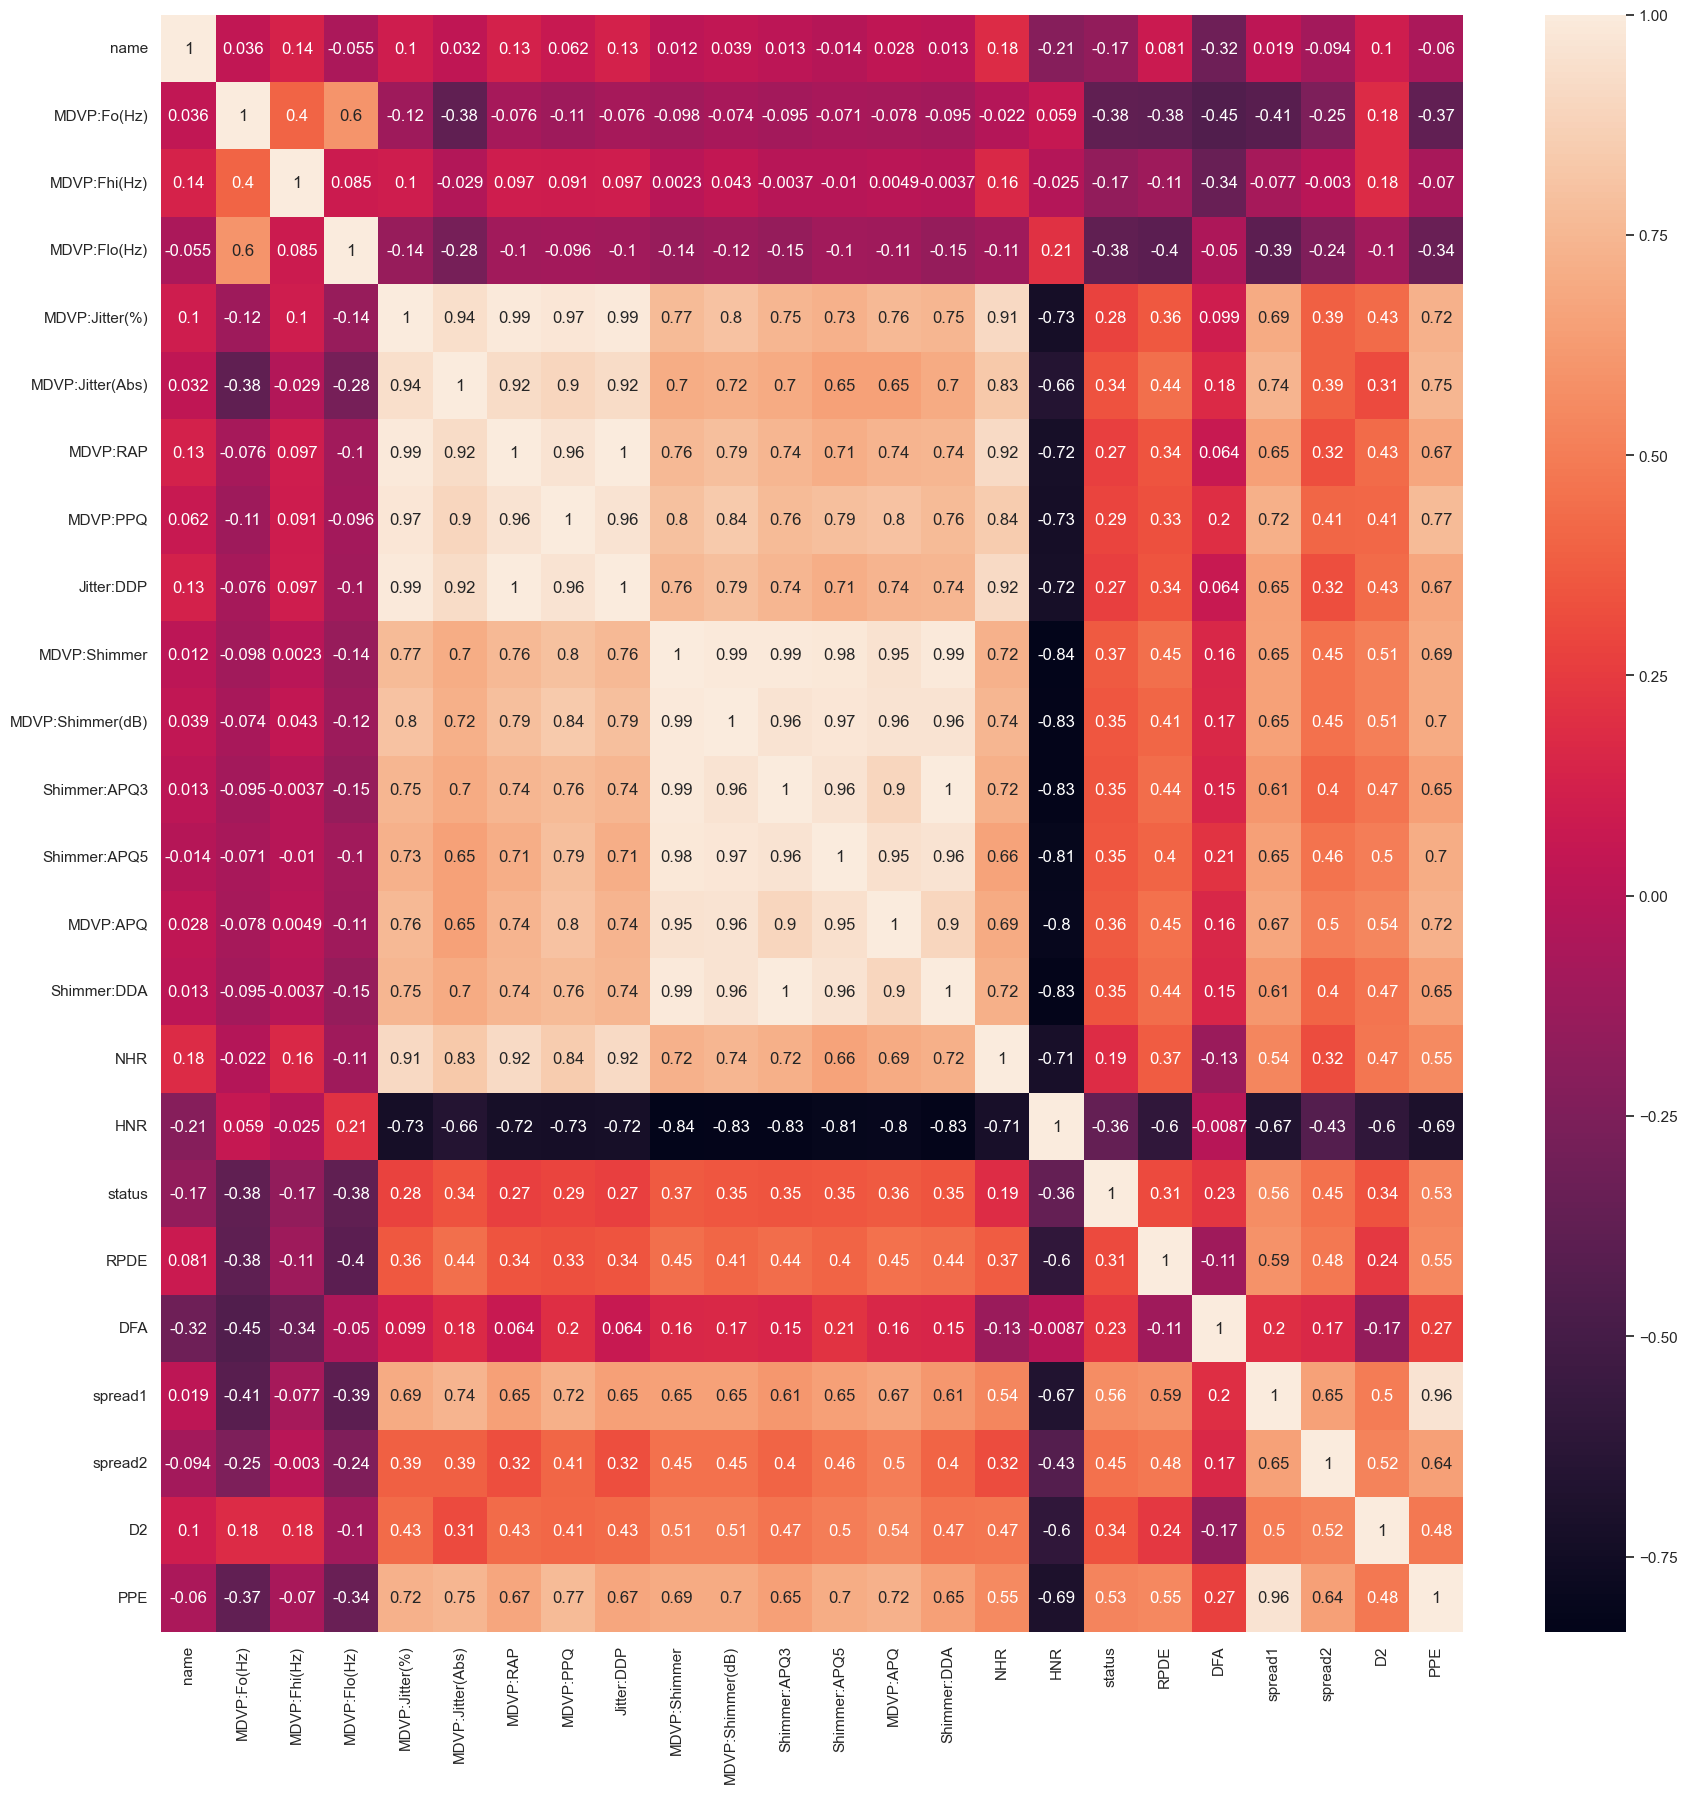

In [13]:
sns.set(rc={'figure.figsize':(21,21)})
sns.heatmap(parkinsons_data.corr(),annot=True)
plt.show()

Splitting the data to training data & Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Model Training

# Support Vector Machine Model

In [16]:
model = svm.SVC(kernel='linear')

In [17]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [18]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [19]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [20]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [21]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
accuracy=model.score(X_test,Y_test)
accuracy

0.8717948717948718

In [24]:
X_test_prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

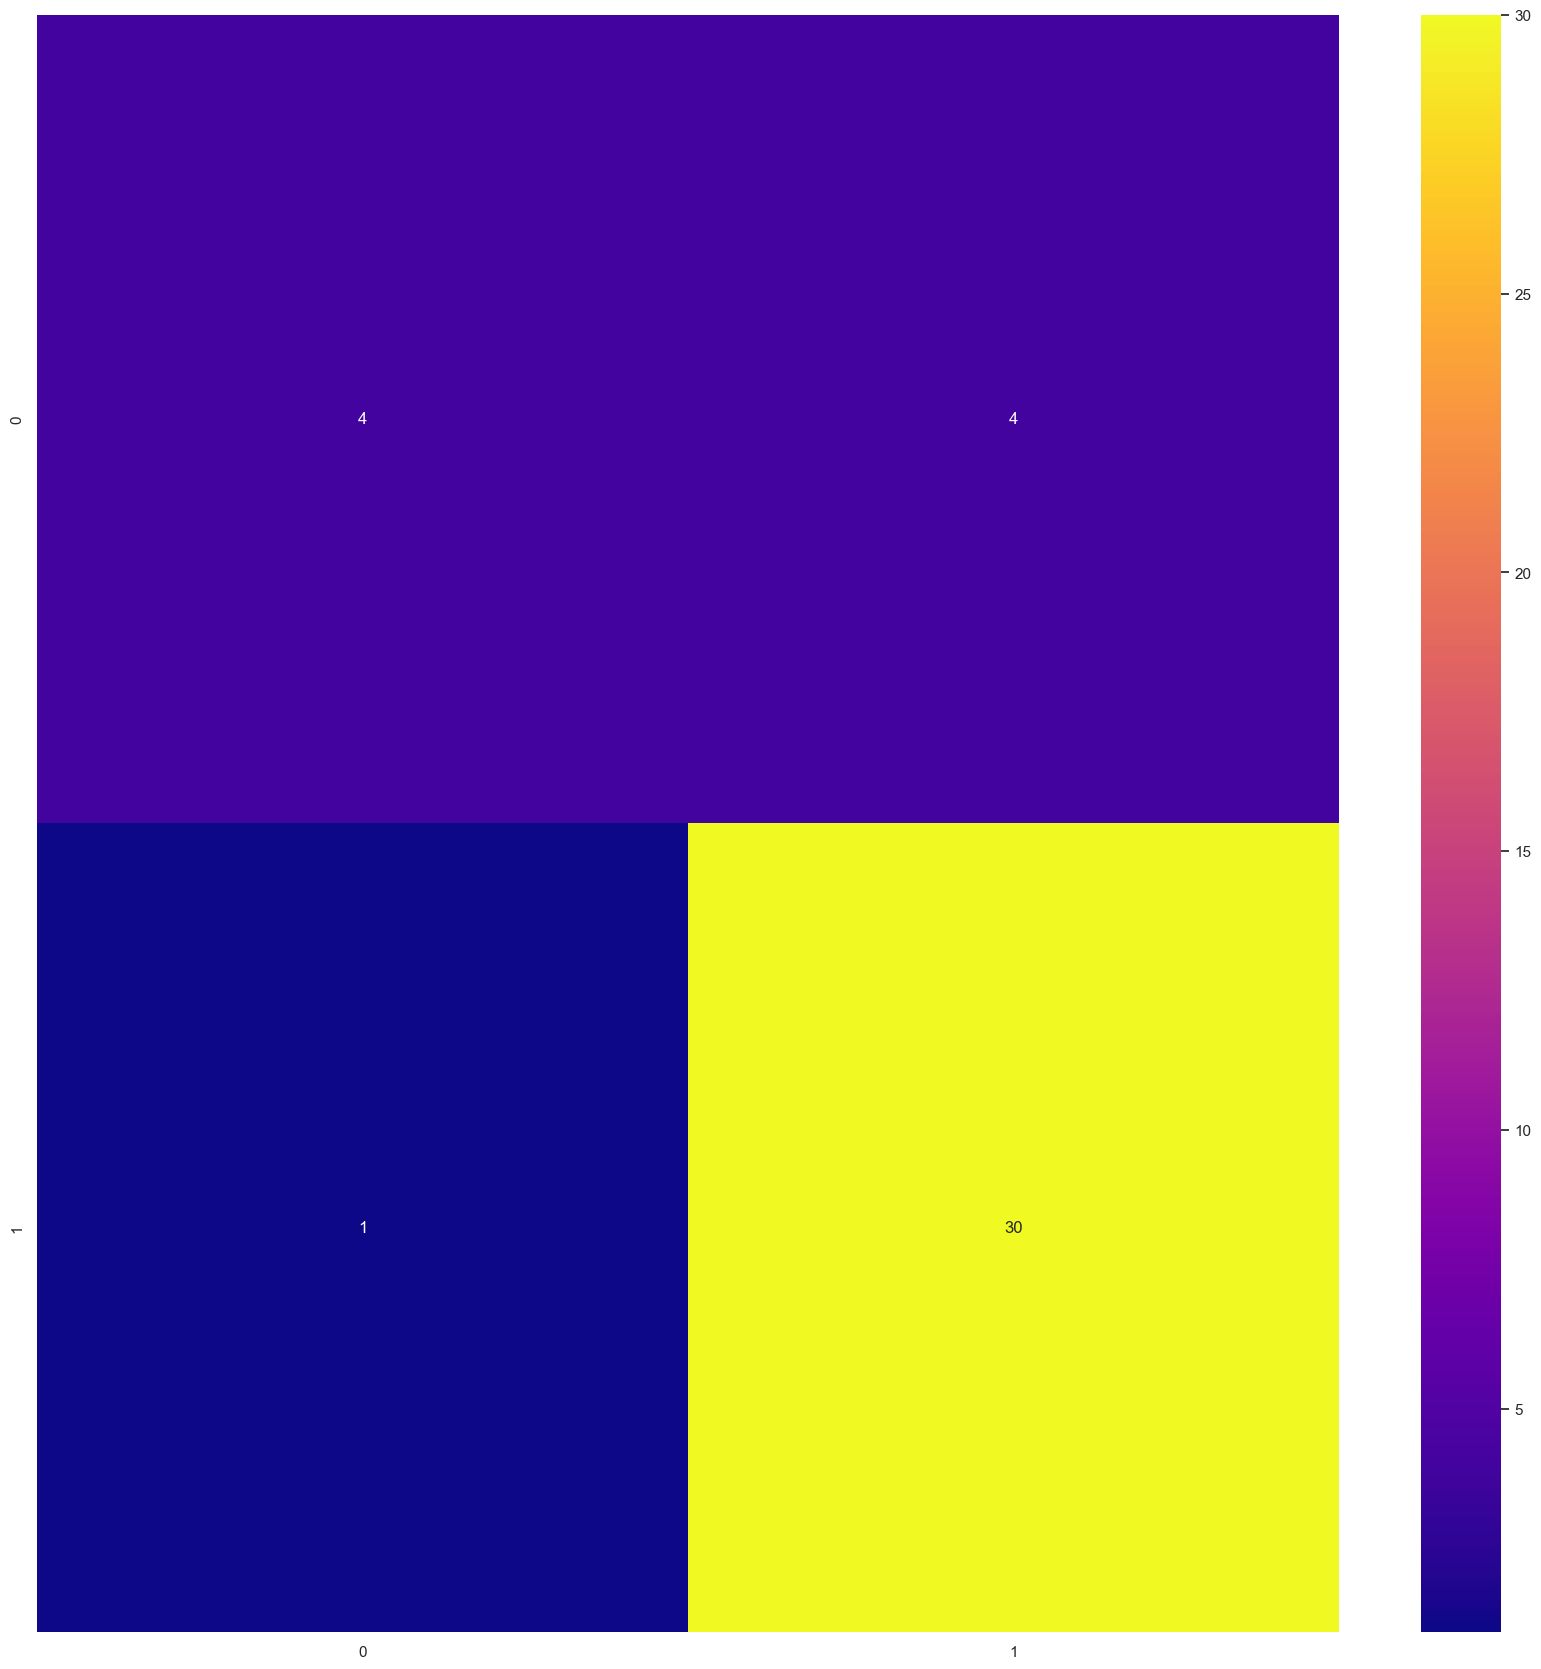

In [25]:
cnf_matrix=confusion_matrix(Y_test,X_test_prediction)
labels=[0,1]
sns.heatmap(cnf_matrix,annot=True,cmap="plasma",xticklabels=labels,yticklabels=labels)
plt.show()

In [26]:
from sklearn.metrics import classification_report

In [27]:
print("\n classification report: \n {}|" . format(classification_report(Y_test,X_test_prediction)))


 classification report: 
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39
|


# decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model=DecisionTreeClassifier(max_depth=500,random_state=300)

In [30]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [31]:
y_pret=model.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
accuracy=model.score(X_test,Y_test)
accuracy

0.7435897435897436

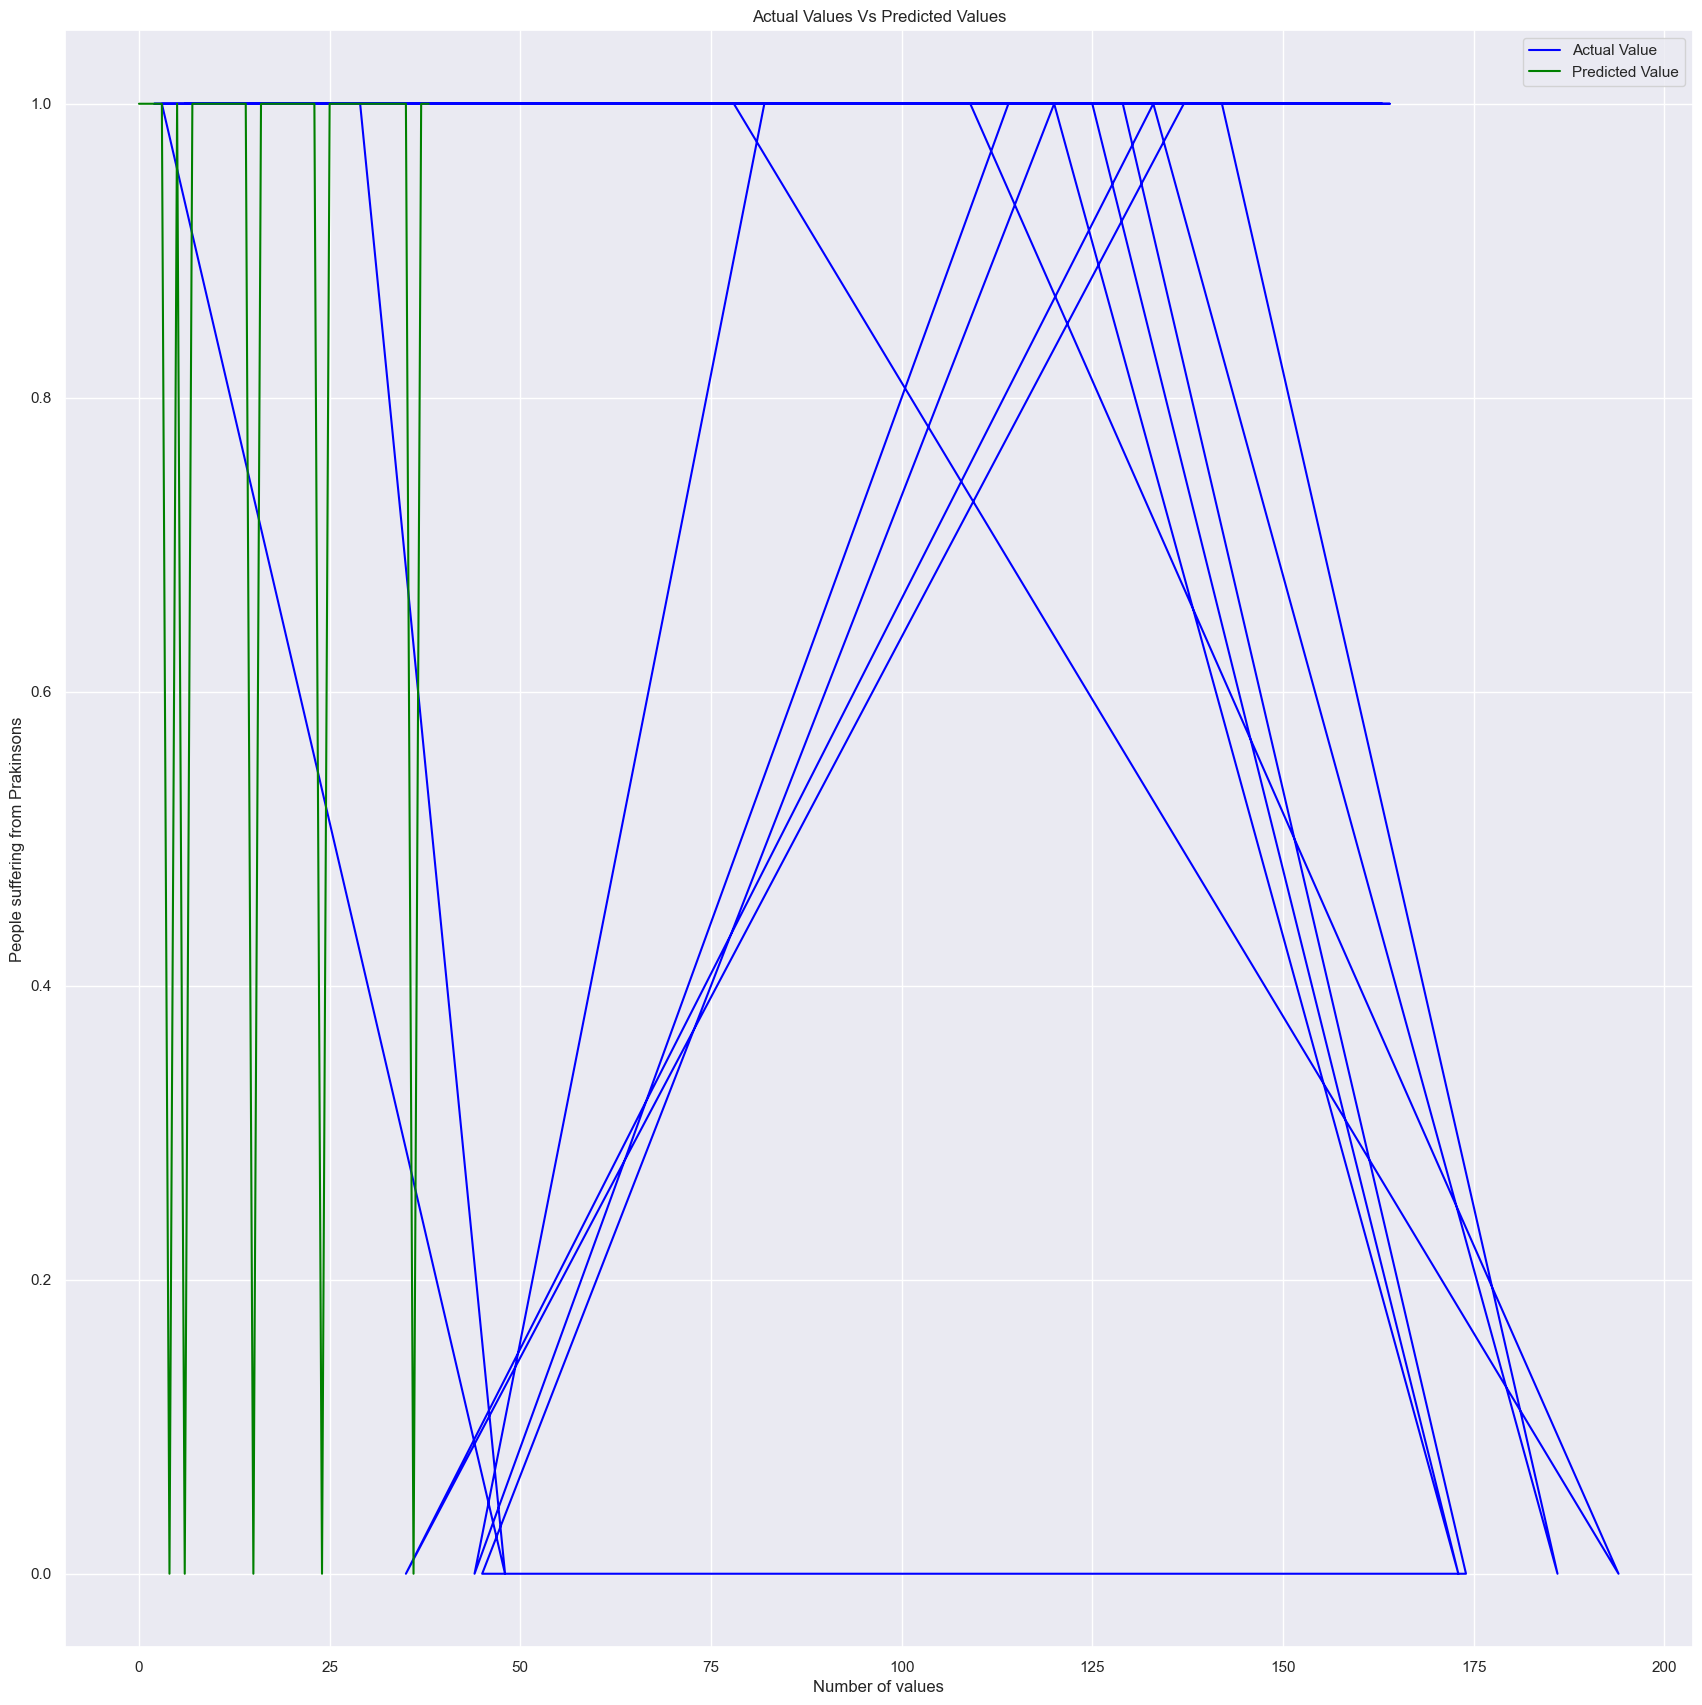

In [92]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(X_test_prediction,color='green',label='Predicted Value')
plt.title('Actual Values Vs Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('People suffering from Prakinsons')
plt.legend()
plt.show()

Building a Predictive System

In [53]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
import warnings
warnings.simplefilter("ignore")
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease
